# Creating Packages


## Topics

- modules
- testing
- packages
- naming conventions
- pretty functions
- variable scope
    - arrays as an exception

## Modules

Notebooks and the REPL are good for rapid development and testing things, but you may quickly find it limiting. Most of the time you want to develop any larger projects as modules and control scripts.

Modules are used to store function and structures you need often. They can be shared accross projects. The packages we use are modules written by others and shared so that we can use them and develop them further.

### Scripts

Julia code placed in a .jl file can be executed on the command line.

You can also `include()` the code like we did in the plotting exercises (Ex_05: Simulation).

### Modules

A module is a collection of functions and data structures. Generally the function and structs are tied together by a single purpose or work are useful in similar situations.

To define a module called MyModule, you would create a file called `MyModule.jl` and write something like below:
```julia
module MyModule
export mycoolfunction

function mycoolfunction()
   println("this is my cool function")
end
function mysecretfunction()
   println("this is my secret function")
end

end
```

In fact this file is already in the currect directory.

In [1]:
# To use the module you need to first include the file:
include("MyModule.jl")

# Mymodule is not a package, so "using MyModule" does not work, but it is in the
# Main namespace, so
using Main.MyModule 

When you load the module with the `using` keyword, the `export`ed names are pulled into the global namespace.

In [2]:
mycoolfunction()

this is my cool function


Other names are not in global namespace, but they can still be used:

In [3]:
# This will not work
mysecretfunction()

UndefVarError: UndefVarError: `mysecretfunction` not defined

In [4]:
# But this will
MyModule.mysecretfunction()

this is my secret function


#### Name Collision

Sometimes different modules export things with the same name. Multiple dispatch can take care of multiple methods with the same name, but only if they use different types of input. The `import` method is useful here.

In [5]:
module MyOtherModule
export mycoolfunction

function mycoolfunction()
   println("This is my other module")
end
end

import Main.MyOtherModule as other

In [6]:
mycoolfunction()

this is my cool function


In [7]:
other.mycoolfunction()

This is my other module


### include()

Using the include statement to spread your code
into multiple files is a common and useful pattern.

We could write the module above as

```julia
module MyModule
export mycoolfunction

inlude("mycoolfunction.jl")
inlude("mysecretfunction.jl")

end
```

Provided that the functions are defined in the given files.

Don't overdo it, though.  This is a way to add structure to a big project. In this case the functions are not complicated and there is not reason to have them in a separate file.

## Packages

Having to `include()` the file is a problem when you
want to use the same code across projects. 
You would need to know the full path to each of your
module files.

Julia (and most other languages) solves this problem by tracking the files for you. Sets of module-files and related information are called packages. Julia also maintains dependencies between packages so that when you install one, it automatically downloads all the packages it needs.

A package is a folder with
 - One or more module files
 - a `Project.toml`

The `Project.toml` file contains some information about
the package and a list of other packages your package
depends on. The easiest way to go from a module file
(or several module files) to a package is to use the
Pkg module:

In [1]:
using Pkg
Pkg.generate("MyPackage")

  Generating  project MyPackage:
    MyPackage\Project.toml
    MyPackage\src\MyPackage.jl


Dict{String, Base.UUID} with 1 entry:
  "MyPackage" => UUID("a0a80e5a-0a6d-4649-b1b3-906a0fc03f06")

This creates a new `MyPackage` folder with the Project.toml file
and a src directory for the module file. The src folder contains
an automatically generated example project.

Let's try it out. In the exercises you will create and edit a module, but here we are satisfied with using the example package.

In [2]:
Pkg.develop(PackageSpec(path="MyPackage"))
using MyPackage
MyPackage.greet()

   Resolving package versions...

    Updating `C:\Projects\julia-introduction\Project.toml`
  [a0a80e5a] + MyPackage v0.1.0 `notebooks\MyPackage`
    Updating `C:\Projects\julia-introduction\Manifest.toml`


  [a0a80e5a] + MyPackage v0.1.0 `notebooks\MyPackage`

Hello World!

`Pkg.develop` is similar to `Pkg.add`, but it any changes we make 
to the package will take effect when you import or use the package. With `Pkg.add` you would need to manually reinstall.

## Development environments and dependencies

The best way to track the packages you project depends on is to use 
Julia's built-in development environment manager.

When a development environment is active, Julia will only see the packages installed inside that environment. The `project.toml` file is
automatically updated whenever you install a new package.

You can create an environment in any folder, it does not need to be a package. To do this, run
```Julia
Pkg.activate(".")
```

We can also activate the environment of our package by specifying its
path.

In [ ]:
Pkg.activate("MyPackage")
# Now the plot package is no longer available, since it is not listed
# in MyPackage/project.toml
using Plots

Now see what happens in when we install it:

In [ ]:
Pkg.activate("MyPackage")
Pkg.add("Plots")

### Exercise 1: Create a package

Create a package called "Epidemic". Use the `Pkg.generate` function and make it available using the `Pkg.develop` and the `PackageSpec` functions.

Look through the files created.

In [5]:
using Pkg
Pkg.generate("Epidemic")

  Generating  project Epidemic:
    Epidemic\Project.toml
    Epidemic\src\Epidemic.jl


Dict{String, Base.UUID} with 1 entry:
  "Epidemic" => UUID("8ee5b7ce-2354-4344-9945-1073ab540ebf")

In [13]:
Pkg.activate("MyPackage")
Pkg.develop(PackageSpec(path="Epidemic"))

  Activating project at `c:\Projects\julia-introduction\notebooks\MyPackage`


   Resolving package versions...


    Updating `C:\Projects\julia-introduction\notebooks\MyPackage\Project.toml`
  [8ee5b7ce] + Epidemic v0.1.0 `..\Epidemic`
    Updating `C:\Projects\julia-introduction\notebooks\MyPackage\Manifest.toml`


  [8ee5b7ce] + Epidemic v0.1.0 `..\Epidemic`


Try activating the packages environment using `Pkg.activate("Epidemic")`. Take a look at the `Project.toml` file.

Then install the `Test` package and see how the `Project.toml` file changes.

In [ ]:
Pkg.activate("Epidemic")

In [ ]:
# Install the Plot package that will be needed for the simulation
Pkg.add("Plots")

The file contains all the information necessary to reproduce install your package and all its dependencies.

### Exercise 2: Export

The new package contains a function called `greet`, but it is not exported. If you use the package with the `using` keyword, the `greet` function does not get added to the global name space (but it can be used with the `.`-syntax.

Export the `greet`-function from the module, so that it can be called directly in the global name space.

You should modify the file `Epidemic/src/Epidemic.jl`. Add a line with the `export` keyword.

In [4]:
# Test your package by running this. The greet function should be found.
using Epidemic
greet()

Hello World!

### Exercise 3: Epidemic

Copy the functions and structs we have written for the epidemic simulation into `Epidemic/src/Epidemic.jl`. You can find these in `epidemic.jl` in the main folder.

What do you need to export to be able to run a simulation?

To see the changes, you unfortunately need to restart the kernel. After this, run
```julia
using Pkg
Pkg.activate("Epidemic")
using Epidemic
```

Run a few simulation steps and show the result to make sure everything works.

In [1]:
using Pkg
Pkg.activate("Epidemic")
using Epidemic

  Activating project at `c:\Projects\julia-introduction\notebooks\Epidemic`


In [5]:
plant1 = Plant(uninfected, 0)
plant2 = Plant(infected, 0)

(plant1, plant2) = (◻, ◼)


In [22]:
plants = make_plants(32, 32, 0.2);

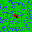

In [21]:
update!(plants, 8, 0.02, 0.1)
to_colors.(plants)

## Testing

- The only way to make sure your code actually works is to test it.
- Julia has convenient built-in macros for automated tests. 

In [6]:
import Pkg
Pkg.activate("MyPackage")
Pkg.add("Test")

  Activating project at `c:\Projects\julia-introduction\notebooks\MyPackage`


   Resolving package versions...


    Updating `C:\Projects\julia-introduction\notebooks\MyPackage\Project.toml`
  [8dfed614] + Test
  No Changes to `C:\Projects\julia-introduction\notebooks\MyPackage\Manifest.toml`

In [7]:
using Test
@test 1 + 1 == 2

Test Passed

- Group related tests together into a test set

In [8]:
@testset "Test arithmetic equalities" begin
    @test 1 + 1 == 2
end

Test Summary:              | Pass  Total  Time
Test arithmetic equalities |    1      1  0.1s


Test.DefaultTestSet("Test arithmetic equalities", Any[], 1, false, false, true, 1.708196951779e9, 1.708196951911e9, false, "c:\\Projects\\julia-introduction\\notebooks\\07_creating_packages.ipynb")

### Testing a package

It is good practice to add a set of tests to your packages. This
 - ensures that it works as intended
 - defines what actually works
 
The tests are added to `test/runtests.jl` in the package 
directory. We will add the following to `MyPackage`:
```julia
using Test
@testset "Test arithmetic equalities" begin
    @test 1 + 1 == 2
end
```

If you didn't already, you also need to add the `Test` package to `MyPackage`s dependencies:
```julia
Pkg.activate("MyPackage")
Pkg.add("Test")
```

The `project.toml` file should look something like this:

```
name = "MyPackage"
uuid = "2079a258-defa-40a0-8316-dccef70ae21b"
authors = ["Jarno Rantaharju"]
version = "0.1.0"

[deps]
Test = "8dfed614-e22c-5e08-85e1-65c5234f0b40"
```

Now you can run the tests using the Pkg module:

In [ ]:
Pkg.activate("MyPackage")
Pkg.test("MyPackage")

### Exercise 4: Testing

Add a test to the `Epidemic` package. 

Create a folder called `test` and a file named `runtests.jl` in it.

In `runtests.jl` create an uninfected and an infected Plant. Run `interact!` with  `infection_rate=1` and make sure that the uninfected plant becomes infected if the other plant is infected.

```julia
using Test
using Epidemic

@testset "Test certain infection" begin
    plant1 = Plant(Epidemic.uninfected, 0)
    plant2 = Plant(Epidemic.infected, 0)
    interact!(...)
    @test ...
end
```
Note that you need to restart the kernel again.

In [1]:
# add Test package to Epidemic
using Pkg
Pkg.activate("Epidemic")
Pkg.add("Test")

  Activating project at `c:\Projects\julia-introduction\notebooks\Epidemic`


   Resolving package versions...


  No Changes to `C:\Projects\julia-introduction\notebooks\Epidemic\Project.toml`
  No Changes to `C:\Projects\julia-introduction\notebooks\Epidemic\Manifest.toml`

In [2]:
# Run this to check
using Pkg
Pkg.test("Epidemic")

     Testing Epidemic


      Status `C:\Users\jiahuang\AppData\Local\Temp\jl_sEl9Ph\Project.toml`
  [8ee5b7ce] Epidemic v0.1.0 `C:\Projects\julia-introduction\notebooks\Epidemic`
  [91a5bcdd] Plots v1.40.1
  [8dfed614] Test
      Status `C:\Users\jiahuang\AppData\Local\Temp\jl_sEl9Ph\Manifest.toml`


  [d1d4a3ce] BitFlags v0.1.8
  [944b1d66] CodecZlib v0.7.4
  [35d6a980] ColorSchemes v3.24.0
  [3da002f7] ColorTypes v0.11.4
  [c3611d14] ColorVectorSpace v0.10.0
  [5ae59095] Colors v0.12.10
  [34da2185] Compat v4.12.0
  [f0e56b4a] ConcurrentUtilities v2.3.1
  [d38c429a] Contour v0.6.2
  [9a962f9c] DataAPI v1.16.0
  [864edb3b] DataStructures v0.18.16
  [8bb1440f] DelimitedFiles v1.9.1
  [ffbed154] DocStringExtensions v0.9.3
  [8ee5b7ce] Epidemic v0.1.0 `C:\Projects\julia-introduction\notebooks\Epidemic`
  [460bff9d] ExceptionUnwrapping v0.1.10
  [c87230d0] FFMPEG v0.4.1
  [53c48c17] FixedPointNumbers v0.8.4
  [59287772] Formatting v0.4.2
  [28b8d3ca] GR v0.73.2
  [42e2da0e] Grisu v1.0.2
  [cd3eb016] HTTP v1.10.2
  [92d709cd] IrrationalConstants v0.2.2
  [1019f520] JLFzf v0.1.7
  [692b3bcd] JLLWrappers v1.5.0
  [682c06a0] JSON v0.21.4
  [b964fa9f] LaTeXStrings v1.3.1
  [23fbe1c1] Latexify v0.16.1
  [2ab3a3ac] LogExpFunctions v0.3.27
  [e6f89c97] LoggingExtras v1.0.3
  [1914dd2f] MacroT

Precompiling

 project...


  ✓ Epidemic
  1 dependency successfully precompiled in 6 seconds. 148 already precompiled.


     Testing Running tests...


Test Summary:          | Pass  Total  Time


Test certain infection |    1      1  0.1s
     Testing Epidemic tests passed 


## Naming conventions in Julia

- Word separation can be indicated by underscores (`_`), but use of underscores is discouraged unless the name would be hard to read otherwise.
- Names of Types begin with a capital letter and word separation is shown with CamelCase instead of underscores.
- Names of functions and macros are in lower case, without underscores.  
- Functions that modify their inputs have names that end in `!`. These functions are sometimes called mutating functions or in-place functions.


## Making functions pretty: optional arguments
You can define functions with optional arguments, so that the function can use sensible defaults if specific values aren't supplied. You provide a default symbol and value in the argument list

* *optional argument* is usually used when the input arguments are not necessary to be provided by the user. If the user does not provide the value of the optional argument, the default value will be used.

In [1]:
function xyzpos(x, y, z=0)
    println("$x, $y, $z")
end

xyzpos (generic function with 2 methods)

In [2]:
xyzpos(0,0)
xyzpos(0,0,1)

0, 0, 0
0, 0, 1


## Making functions pretty: keyword arguments
When you write a function with a long list of arguments like this:
```julia
function f(p, q, r, s, t, u)
...
end
```
sooner or later, you will forget the order in which you have to supply the arguments. 

You can avoid this problem by using keywords to label arguments. Use a semicolon (`;`) after the function's unlabelled arguments, and follow it with one or more `keyword=value` pairs.

* *keyword argument* is not place-binding, unlike the *optional argument*. The user can provide the value of the keyword argument in any order.

In [3]:
function f(p, q ; radius = 4, message = "hello")
  println("p is $p")
  println("q is $q")
  return "radius => $radius, message => $message"
end
f(1,2)
f("a", "b", radius=pi, message=22//7)

p is 1
q is 2


p is a
q is b


"radius => π, message => 22//7"

### Exercise 5: Pretty functions

Write a function called `blackbox`. It should behave such that it takes a number as an input and adds one to it. If a keyword argument `reverse=true` is also given, it should subtract one instead.

In [4]:
function blackbox(x::Number; reverse=false)
    reverse ? x - 1 : x + 1
end

blackbox (generic function with 1 method)

In [5]:
# Run these to check
blackbox(1)

2

In [6]:
blackbox(2.0)

3.0

In [7]:
blackbox(100, reverse=true)

99

Write another `blackbox2` function that behaves like the previous but when given two arguments it uses the second argument as the value it adds or substracts. With one argument it behaves like the previous function.

Hint: remember optional arguments that can be given a default value!

In [8]:
function blackbox2(x::Number, y::Number=1; reverse=false)
    reverse ? x - y : x + y
end

blackbox2 (generic function with 2 methods)

In [9]:
# Run these to check
blackbox2(10,5)

15

In [10]:
blackbox2(10,5,reverse=true)

5

## Advanced: Functions with variable number of arguments
Functions can be defined so that they can accept any number of arguments:

In [11]:
function fvar(args...)
    println("you supplied $(length(args)) arguments")
    for arg in args
       println(" argument ", arg)
    end
end
fvar()
fvar(64)
fvar(64, 64, 55)

you supplied 0 arguments
you supplied 1 arguments


 argument 64
you supplied 3 arguments
 argument 64
 argument 64
 argument 55


The three dots indicate the **splat**. Here it means "any", including "none". 

## Advanced: Parametric methods
Method definitions can optionally have type parameters qualifying the signature:

In [27]:
# "T" is simply a covnetion, it could be any name e.g. A, B, C, etc.
# {} is used to specify type parameters, and is mandatory only for mutiple type parameters.
# "where {T}" is equivalent to "where {T<:Any}"
# By using the "where" keyword, a type parameter "T" is created and can be used in defining the type of arguments.
function same_type(x::T, y::T) where {T}
    true
end

function same_type(x,y)
    false
end

same_type (generic function with 2 methods)

The first method applies whenever both arguments are of the same concrete type, regardless of what type that is, while the second method acts as a catch-all, covering all other cases. Thus, overall, this defines a boolean function that checks whether its two arguments are of the same type

In [21]:
same_type(1,2)

true

In [22]:
same_type(1, 2.0)

false

In [15]:
same_type(1.0, 2.0)

true

In [16]:
same_type("foo", 2.0)

false

In [17]:
same_type(Int32(1), Int64(2))

false

## Scope of variables
- Global scope
    - Module specific (namespaces)
- Local scopes
    - functions, for's, while's,...

## Local scope
A new local scope is introduced by most code-blocks.
    
A local scope usually inherits all the variables from its parent scope, both for reading and writing. 

A newly introduced variable in a local scope does not back-propagate to its parent scope. For example, here the z is not introduced into the top-level scope:

In [28]:
for i = 1:10
    z = 1
end
z

UndefVarError: UndefVarError: `z` not defined

Function definitions are also in their own local scope. 

They do, however, inherit from their parent scope.

In [29]:
x, y = 1, 2
function foo()
    x = 2 #assignment introduces a new local
    return x + y # y refers to the global scope!
end

foo (generic function with 1 method)

In [30]:
foo()

4

In [31]:
x

1

An explicit `global` is needed to assign to a global variable:

In [32]:
x = 1
function foobar()
    global x = 2 # Now x is also in global scope, and replace the value of x in the parent scope.
    return x + y
end

foobar (generic function with 1 method)

In [33]:
foobar()

4

In [34]:
x

2

## Exception: Elements of a global array are global
There is an important exception to these rules: arrays.

Changing an elements of an array in global scope is done in the global scope. An array points to a place in memory, so changing it's internal values changes the original memory, even inside a function.

In [35]:
arr = [1,2,3]
function oops()
    arr[2] = 10
    arrr = [1,2,3]
    
    return "woops"
end

oops (generic function with 1 method)

In [36]:
oops()

"woops"

In [37]:
arr

3-element Vector{Int64}:
  1
 10
  3

In [38]:
arrr

UndefVarError: UndefVarError: `arrr` not defined

## Constants
A common use of variables is giving names to specific, unchanging values. 

Such variables are only assigned once. This intent can be conveyed to the compiler using the `const` keyword:

In [39]:
const e  = 2.71828182845904523536

2.718281828459045

It is difficult for the compiler to optimize code involving global variables, since their values (or even their types) might change at almost any time. If a global variable will not change, adding a const declaration solves this performance problem.

## Summary
- Modules and packages help with structure large code bases.
- Writing pretty code is a good thing
    - see also the official [style guide](https://docs.julialang.org/en/v1/manual/style-guide/)